In [5]:
import pandas as pd

# Load the datasets
combined_path = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/combined.csv"
isolate_path = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/isolate_competency.csv"

combined_df = pd.read_csv(combined_path)
isolate_df = pd.read_csv(isolate_path)

# Clean column names (strip spaces and make lowercase)
combined_df.columns = combined_df.columns.str.strip().str.lower()
isolate_df.columns = isolate_df.columns.str.strip().str.lower()

# Ensure correct column names
sample_col_combined = "samplename"
competency_col_combined = "competency"
sample_col_isolate = "isolate"
competency_col_isolate = "competency_x"  
source_col = "sourcefile"

# Get unique SourceFile values
unique_sources = combined_df[source_col].unique()

# Create a dictionary to store match counts for each SourceFile
match_results = []

# Iterate through each unique SourceFile
for source in unique_sources:
    # Filter combined.csv data for this SourceFile
    filtered_combined = combined_df[combined_df[source_col] == source]
    total_count = len(filtered_combined)
    
    # Merge with isolate_competency.csv on SampleName and isolate
    merged_df = filtered_combined.merge(isolate_df, left_on=sample_col_combined, right_on=sample_col_isolate, how="left")
    
    # Count matches
    match_count = (merged_df[competency_col_combined] == merged_df[competency_col_isolate]).sum()
    
    # Store result
    match_results.append({
        "SourceFile": source,
        "MatchCount": match_count,
        "TotalCount": total_count
    })

# Convert match results to a DataFrame
results_df = pd.DataFrame(match_results)

# Save the results to a CSV file
output_csv = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/match_results.csv"
results_df.to_csv(output_csv, index=False)

print(f"Match results saved to {output_csv}")

# Print output
for _, row in results_df.iterrows():
    print(f"{row['SourceFile']}: {row['MatchCount']} / {row['TotalCount']} matches")

Match results saved to /Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/match_results.csv
Low-Quality: 1180 / 1659 matches
Low-Read-Length: 1480 / 1659 matches
Standard: 1480 / 1659 matches
Very-Poor-Quality: 680 / 1659 matches
Low-Depth: 800 / 1659 matches


Bar graph saved as /Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/match_results_plot.png


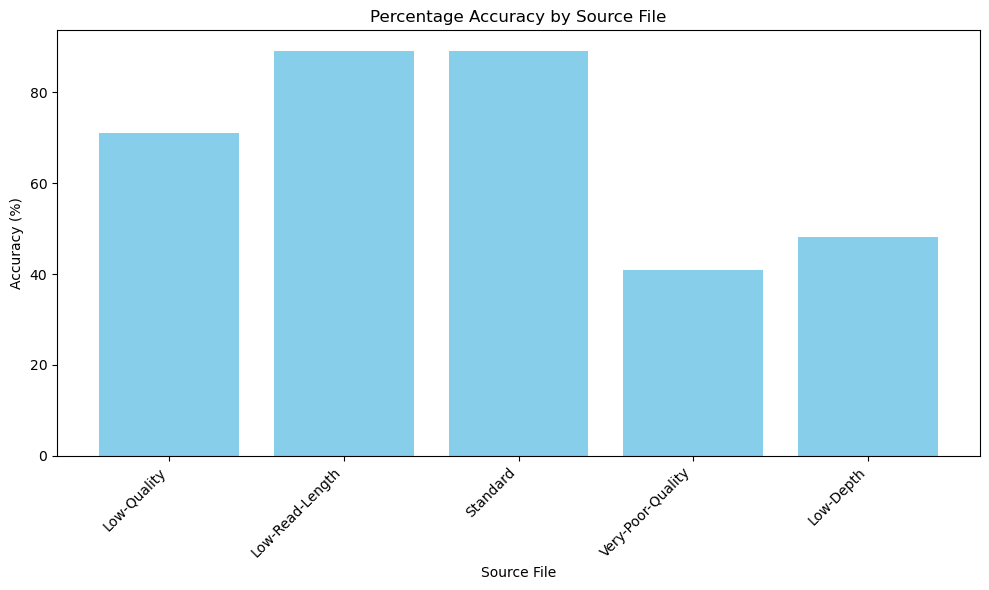

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the match_results.csv file
input_csv = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/match_results.csv"
data = pd.read_csv(input_csv)

# Ensure the required columns exist
if 'SourceFile' not in data.columns or 'MatchCount' not in data.columns or 'TotalCount' not in data.columns:
    raise ValueError("The CSV file must contain 'SourceFile', 'MatchCount', and 'TotalCount' columns.")

# Calculate percentage accuracy
data['Accuracy (%)'] = (data['MatchCount'] / data['TotalCount']) * 100

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(data['SourceFile'], data['Accuracy (%)'], color='skyblue')
plt.xlabel('Source File')
plt.ylabel('Accuracy (%)')
plt.title('Percentage Accuracy by Source File')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image
output_image = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/match_results_plot.png"
plt.savefig(output_image)
print(f"Bar graph saved as {output_image}")

# Show the plot
plt.show()

In [7]:
import pandas as pd

# Load the match_results.csv file
input_csv = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/match_results.csv"
output_csv = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/match_results_with_accuracy.csv"

# Read the CSV file
data = pd.read_csv(input_csv)

# Ensure the required columns exist
if 'MatchCount' not in data.columns or 'TotalCount' not in data.columns:
    raise ValueError("The CSV file must contain 'MatchCount' and 'TotalCount' columns.")

# Calculate accuracy of prediction
data['Accuracy of Prediction (%)'] = (data['MatchCount'] / data['TotalCount']) * 100

# Save the updated DataFrame to a new CSV file
data.to_csv(output_csv, index=False)

print(f"Updated CSV with accuracy column saved to {output_csv}")

Updated CSV with accuracy column saved to /Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/match_results_with_accuracy.csv


In [8]:
# Load the combined.csv file
input_csv = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/combined.csv"
output_csv = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/average_identity_by_sourcefile.csv"

# Read the CSV file
data = pd.read_csv(input_csv)

# Ensure the required columns exist
if 'Identity (%)' not in data.columns or 'SourceFile' not in data.columns:
    raise ValueError("The CSV file must contain 'Identity (%)' and 'SourceFile' columns.")

# Group by SourceFile and calculate the average Identity (%)
average_identity = data.groupby('SourceFile')['Identity (%)'].mean().reset_index()

# Rename the columns for clarity
average_identity.columns = ['SourceFile', 'Average Identity (%)']

# Save the results to a new CSV file
average_identity.to_csv(output_csv, index=False)

print(f"Average Identity (%) by SourceFile saved to {output_csv}")

Average Identity (%) by SourceFile saved to /Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/average_identity_by_sourcefile.csv


In [9]:
import pandas as pd

# File paths
average_identity_csv = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/average_identity_by_sourcefile.csv"
match_results_csv = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/match_results_with_accuracy.csv"
output_csv = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/combined_results.csv"

# Load the CSV files
average_identity_df = pd.read_csv(average_identity_csv)
match_results_df = pd.read_csv(match_results_csv)

# Ensure the required columns exist
if 'SourceFile' not in average_identity_df.columns or 'SourceFile' not in match_results_df.columns:
    raise ValueError("Both CSV files must contain the 'SourceFile' column.")

# Merge the two DataFrames on the SourceFile column
combined_df = pd.merge(average_identity_df, match_results_df, on='SourceFile', how='inner')

# Save the combined DataFrame to a new CSV file
combined_df.to_csv(output_csv, index=False)

print(f"Combined results saved to {output_csv}")

Combined results saved to /Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/combined_results.csv


Scatter plot saved as /Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/average_identity_vs_accuracy_colored.png


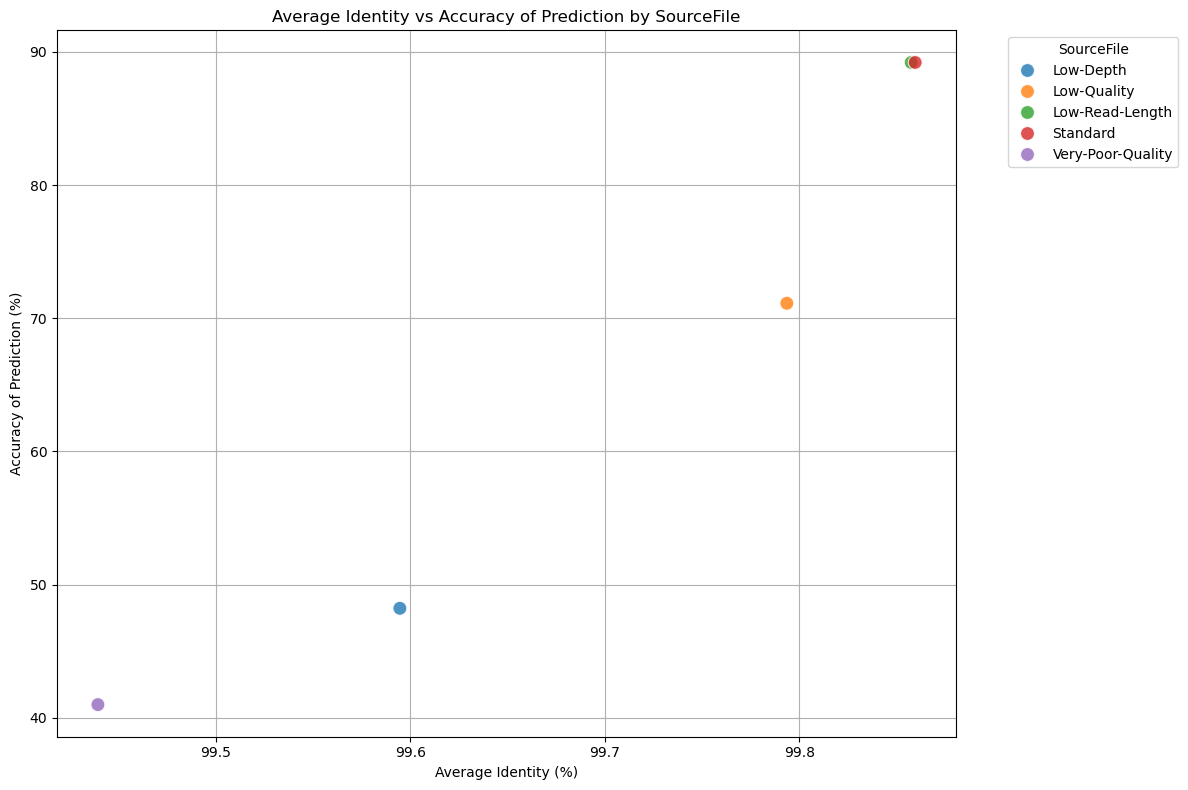

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path for the combined results CSV
input_csv = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/combined_results.csv"

# Read the combined_results.csv file
data = pd.read_csv(input_csv)

# Ensure the required columns exist
if 'Average Identity (%)' not in data.columns or 'Accuracy of Prediction (%)' not in data.columns or 'SourceFile' not in data.columns:
    raise ValueError("The CSV file must contain 'Average Identity (%)', 'Accuracy of Prediction (%)', and 'SourceFile' columns.")

# Plot Average Identity (%) vs Accuracy of Prediction (%) with different colors for each SourceFile
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data,
    x='Average Identity (%)',
    y='Accuracy of Prediction (%)',
    hue='SourceFile',  
    palette='tab10',   
    s=100,             
    alpha=0.8          
)

# Add labels and title
plt.xlabel('Average Identity (%)')
plt.ylabel('Accuracy of Prediction (%)')
plt.title('Average Identity vs Accuracy of Prediction by SourceFile')
plt.legend(title='SourceFile', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(True)

# Save the plot as an image
output_image = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/average_identity_vs_accuracy_colored.png"
plt.tight_layout()
plt.savefig(output_image)
print(f"Scatter plot saved as {output_image}")

# Show the plot
plt.show()


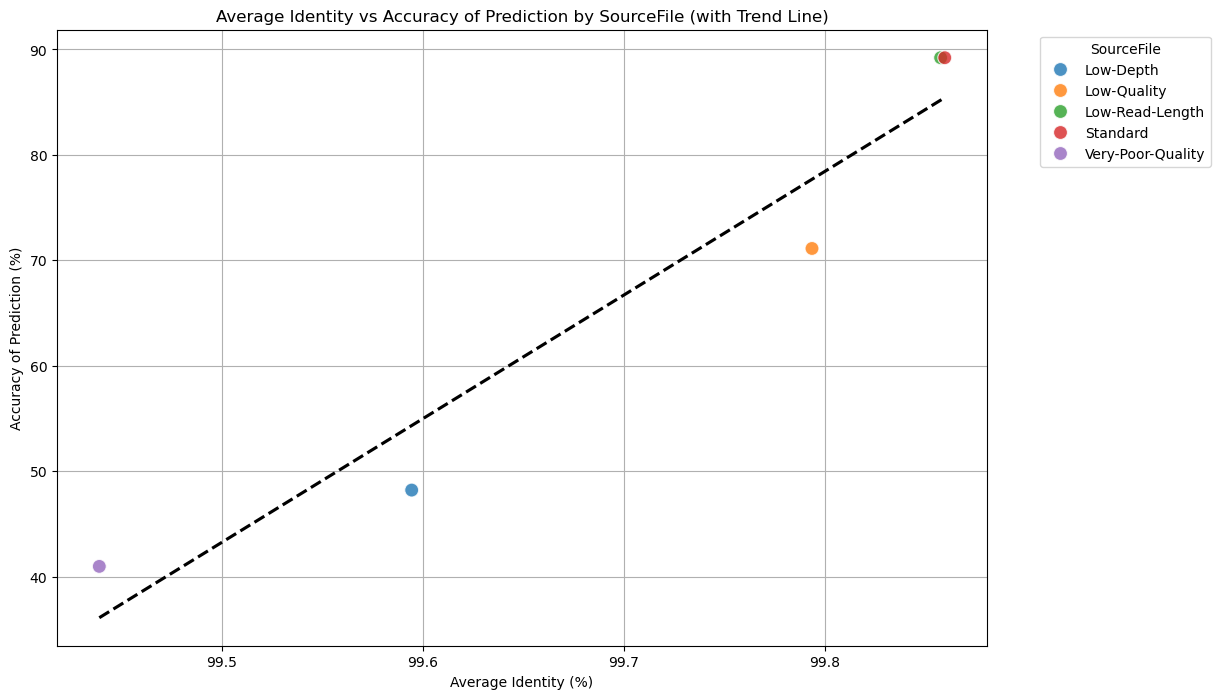

In [ ]:
# Ensure the required libraries are imported
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path for the combined results CSV
input_csv = "/Volumes/Seagate/monotrac/nextflow/isolate_fasta_testing/SR_testing/csvs/combined_results.csv"

# Read the combined_results.csv file
data = pd.read_csv(input_csv)

# Ensure the required columns exist
if 'Average Identity (%)' not in data.columns or 'Accuracy of Prediction (%)' not in data.columns or 'SourceFile' not in data.columns:
    raise ValueError("The CSV file must contain 'Average Identity (%)', 'Accuracy of Prediction (%)', and 'SourceFile' columns.")

# Plot Average Identity (%) vs Accuracy of Prediction (%) coloured by SourceFile
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data,
    x='Average Identity (%)',
    y='Accuracy of Prediction (%)',
    hue='SourceFile',  
    palette='tab10',   
    s=100,             
    alpha=0.8          
)

# Add a global trend line 
sns.regplot(
    data=data,
    x='Average Identity (%)',
    y='Accuracy of Prediction (%)',
    scatter=False,  
    color='black',  
    line_kws={'linestyle': 'dashed'},
    ci=None  
    
)

# Add labels and title
plt.xlabel('Average Identity (%)')
plt.ylabel('Accuracy of Prediction (%)')
plt.title('Average Identity vs Accuracy of Prediction by SourceFile (with Trend Line)')
plt.legend(title='SourceFile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)


plt.show()
